In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Automobile price data _Raw_.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#some of the values contains object i.e ('?') .so we are converting it to the numeric 
data['normalized_losses']=pd.to_numeric(data['normalized-losses'],errors='coerce')

data['Price']=pd.to_numeric(data['price'],errors='coerce')


In [7]:
data.drop(['normalized-losses','price'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

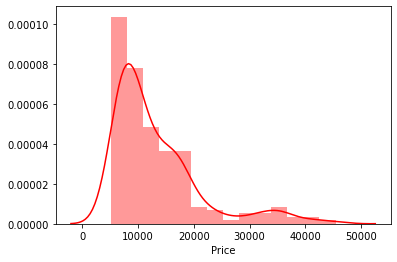

In [9]:
sns.distplot(data['Price'],color='r')

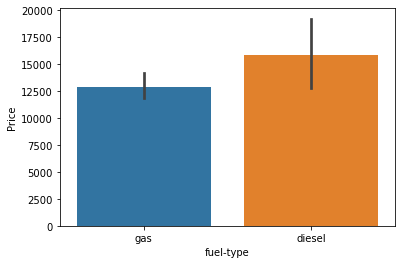

In [10]:
sns.barplot(x='fuel-type',y='Price',data=data)

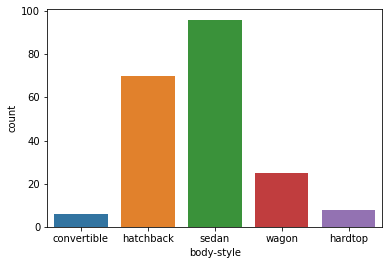

In [11]:
sns.countplot(x='body-style',data=data)

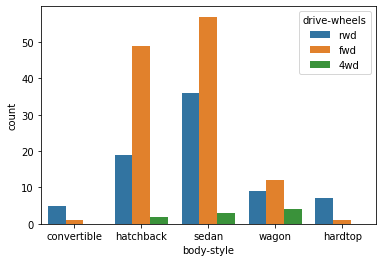

In [12]:
sns.countplot(x='body-style',data=data,hue='drive-wheels')

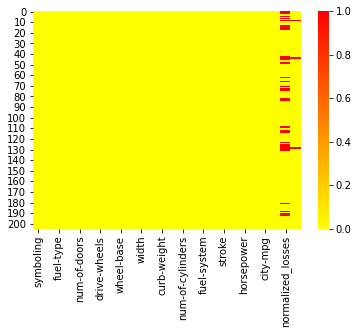

In [13]:
sns.heatmap(data.isnull(),cmap='autumn_r')

In [14]:
#converting categorical values to numeric values by using LabelEncoder
import sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['make']=le.fit_transform(data['make'])  
data['make'].unique()
data['drive-wheels']=le.fit_transform(data['drive-wheels'])  
data['drive-wheels'].unique()
data['fuel-type']=le.fit_transform(data['fuel-type'])  
data['fuel-type'].unique()
data['aspiration']=le.fit_transform(data['aspiration'])  
data['aspiration'].unique()
data['num-of-doors']=le.fit_transform(data['num-of-doors'])  
data['num-of-doors'].unique()
data['body-style']=le.fit_transform(data['body-style'])  
data['body-style'].unique()
data['engine-location']=le.fit_transform(data['engine-location'])  
data['engine-location'].unique()
data['engine-type']=le.fit_transform(data['engine-type'])  
data['engine-type'].unique()
data['num-of-cylinders']=le.fit_transform(data['num-of-cylinders'])  
data['num-of-cylinders'].unique()
data['fuel-system']=le.fit_transform(data['fuel-system'])  
data['fuel-system'].unique()
data['bore']=le.fit_transform(data['bore'])  
data['bore'].unique()
data['stroke']=le.fit_transform(data['stroke'])  
data['stroke'].unique()
data['horsepower']=le.fit_transform(data['horsepower'])  
data['horsepower'].unique()
data['peak-rpm']=le.fit_transform(data['peak-rpm'])  
data['peak-rpm'].unique()


array([10, 16, 19,  2, 15, 11,  8, 21,  7,  6,  1,  3,  5, 12,  0, 17, 20,
       18, 23, 13,  9,  4, 22, 14])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    int32  
 2   fuel-type          205 non-null    int32  
 3   aspiration         205 non-null    int32  
 4   num-of-doors       205 non-null    int32  
 5   body-style         205 non-null    int32  
 6   drive-wheels       205 non-null    int32  
 7   engine-location    205 non-null    int32  
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    int32  
 14  num-of-cylinders   205 non-null    int32  
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [16]:
data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,normalized_losses,Price
0,3,0,1,0,2,0,2,0,88.6,168.8,...,5,23,4,9.0,5,10,21,27,NaN,13495.0
1,3,0,1,0,2,0,2,0,88.6,168.8,...,5,23,4,9.0,5,10,21,27,NaN,16500.0
2,1,0,1,0,2,2,2,0,94.5,171.2,...,5,1,27,9.0,20,10,19,26,NaN,16500.0
3,2,1,1,0,1,3,1,0,99.8,176.6,...,5,13,24,10.0,2,16,24,30,164.0,13950.0
4,2,1,1,0,1,3,0,0,99.4,176.6,...,5,13,24,8.0,8,16,18,22,164.0,17450.0


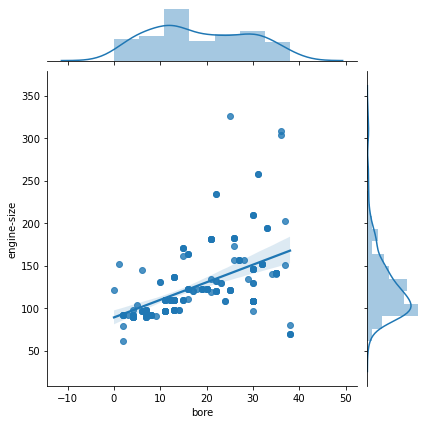

In [17]:
sns.jointplot(x='bore',y='engine-size',data=data,kind='reg')

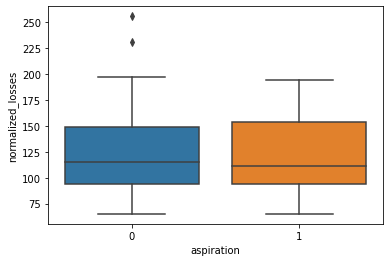

In [18]:
sns.boxplot(x='aspiration',y='normalized_losses',data=data)

In [19]:
def updated_normalized_losses(cols):
    normalized_losses=cols[0]
    aspiration=cols[1]
    if pd.isnull(normalized_losses):
        if aspiration==0:
            return 120.0
        else:
            return 117.5
    else:
        return normalized_losses

In [20]:
data['normalized_losses']=data[['normalized_losses','aspiration']].apply(updated_normalized_losses,axis=1)

In [21]:
data.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,normalized_losses,Price
0,3,0,1,0,2,0,2,0,88.6,168.8,...,5,23,4,9.0,5,10,21,27,120.0,13495.0
1,3,0,1,0,2,0,2,0,88.6,168.8,...,5,23,4,9.0,5,10,21,27,120.0,16500.0
2,1,0,1,0,2,2,2,0,94.5,171.2,...,5,1,27,9.0,20,10,19,26,120.0,16500.0
3,2,1,1,0,1,3,1,0,99.8,176.6,...,5,13,24,10.0,2,16,24,30,164.0,13950.0
4,2,1,1,0,1,3,0,0,99.4,176.6,...,5,13,24,8.0,8,16,18,22,164.0,17450.0
5,2,1,1,0,2,3,1,0,99.8,177.3,...,5,13,24,8.5,4,16,19,25,120.0,15250.0
6,1,1,1,0,1,3,1,0,105.8,192.7,...,5,13,24,8.5,4,16,19,25,158.0,17710.0
7,1,1,1,0,1,4,1,0,105.8,192.7,...,5,13,24,8.5,4,16,19,25,120.0,18920.0
8,1,1,1,1,1,3,1,0,105.8,192.7,...,5,10,24,8.3,15,16,17,20,158.0,23875.0
9,0,1,1,1,2,2,0,0,99.5,178.2,...,5,10,24,7.0,23,16,16,22,117.5,NaN


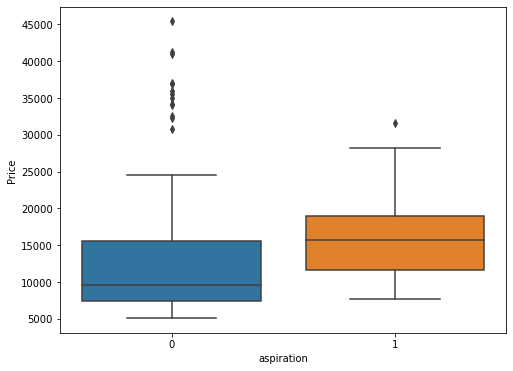

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='aspiration',y='Price',data=data)

In [23]:
def update_Price(cols):
    Price=cols[0]
    aspiration=cols[1]
    if pd.isnull(Price):
        if aspiration==0:
            return 9500
        else:
            return 16000
    return Price
        

In [24]:
data['Price']=data[['Price','aspiration']].apply(update_Price,axis=1)

In [25]:
data.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,normalized_losses,Price
0,3,0,1,0,2,0,2,0,88.6,168.8,...,5,23,4,9.0,5,10,21,27,120.0,13495.0
1,3,0,1,0,2,0,2,0,88.6,168.8,...,5,23,4,9.0,5,10,21,27,120.0,16500.0
2,1,0,1,0,2,2,2,0,94.5,171.2,...,5,1,27,9.0,20,10,19,26,120.0,16500.0
3,2,1,1,0,1,3,1,0,99.8,176.6,...,5,13,24,10.0,2,16,24,30,164.0,13950.0
4,2,1,1,0,1,3,0,0,99.4,176.6,...,5,13,24,8.0,8,16,18,22,164.0,17450.0
5,2,1,1,0,2,3,1,0,99.8,177.3,...,5,13,24,8.5,4,16,19,25,120.0,15250.0
6,1,1,1,0,1,3,1,0,105.8,192.7,...,5,13,24,8.5,4,16,19,25,158.0,17710.0
7,1,1,1,0,1,4,1,0,105.8,192.7,...,5,13,24,8.5,4,16,19,25,120.0,18920.0
8,1,1,1,1,1,3,1,0,105.8,192.7,...,5,10,24,8.3,15,16,17,20,158.0,23875.0
9,0,1,1,1,2,2,0,0,99.5,178.2,...,5,10,24,7.0,23,16,16,22,117.5,16000.0


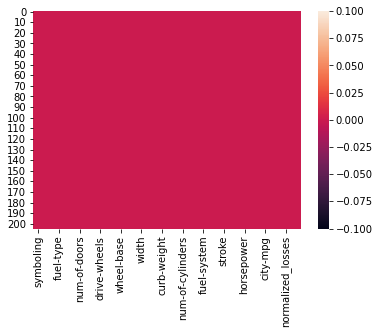

In [26]:
sns.heatmap(data.isnull())

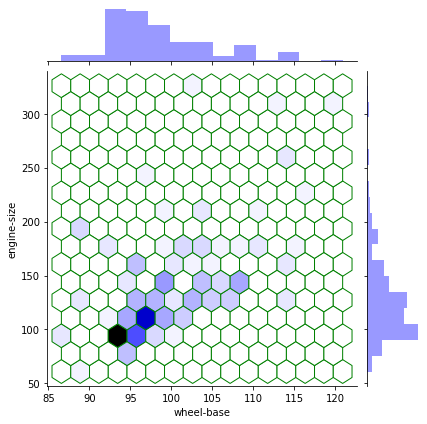

In [27]:
sns.jointplot(x='wheel-base',y='engine-size',data=data,kind='hex',color = 'b',dropna = True, edgecolor="g")

# Training of the model

# Linear Regression


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.drop('Price',axis=1),
                                                 data['Price'],test_size=0.3,
                                                  random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
predictions=model.predict(X_test)

Text(0.5, 1.0, 'Linear Regression')

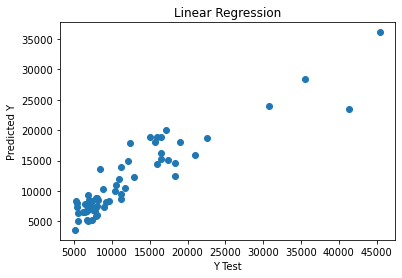

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Linear Regression')

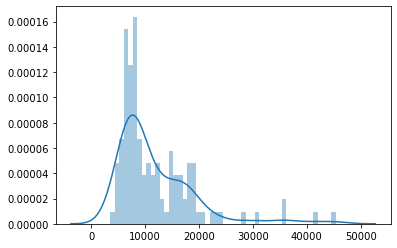

In [33]:
sns.distplot((y_test,predictions),bins=50)

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)


0.8123939657535476

# Support Vector Machine Regressor

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.drop('Price',axis=1),
                                                 data['Price'],test_size=0.3,
                                                  random_state=101)

In [36]:
from sklearn.svm import LinearSVR

In [37]:
svr=LinearSVR()
svr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR()

In [38]:
prediction_svr=svr.predict(X_test)

In [39]:
r2_score(y_test,prediction_svr)

0.6447351851160081

# RandomForest Regressor

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.drop('Price',axis=1),
                                                 data['Price'],test_size=0.3,
                                                  random_state=101)

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rfr= RandomForestRegressor()

In [43]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
pred_rf = rfr.predict(X_test)

In [45]:
r2_score(y_test,pred_rf)

0.9001953001267975

Text(0.5, 1.0, 'RandomForest Regressor')

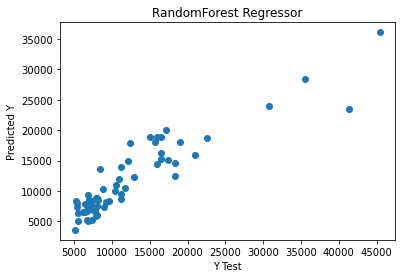

In [46]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RandomForest Regressor')

# GradientBoost Regressor

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.drop('Price',axis=1),
                                                 data['Price'],test_size=0.3,
                                                  random_state=101)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [49]:
pred_gbr=gbr.predict(X_test)

In [50]:
r2_score(y_test,pred_gbr)

0.9088604109527139

Text(0.5, 1.0, 'GradientBoost Regressor')

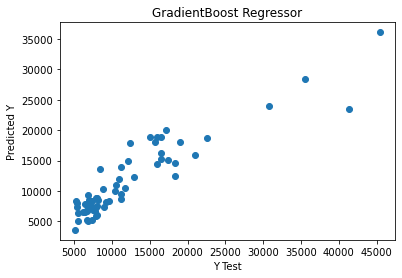

In [51]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('GradientBoost Regressor')

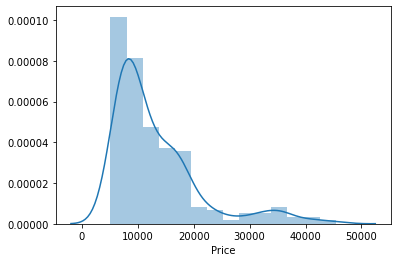

In [52]:
sns.distplot(data['Price'])

# BaggingRegressor

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.drop('Price',axis=1),
                                                 data['Price'],test_size=0.3,
                                                  random_state=101)

In [55]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()
br.fit(X_train,y_train)

BaggingRegressor()

In [56]:
pred_br=br.predict(X_test)

In [57]:
r2_score(y_test,pred_br)

0.8692225368165037

Text(0.5, 1.0, 'Bagging Regressor')

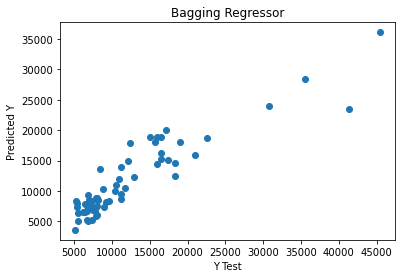

In [58]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Bagging Regressor')

# ExtraTrees Regressor

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [61]:
pred_etr=etr.predict(X_test)

In [62]:
r2_score(y_test,pred_etr)

0.8842824351977883